# Convolutional Networks

Convolutional networks(LeCun, 1989), also known as convolutional neural networks, or CNNs, are a specialized kind of neural network for processing datathat has a known grid-like topology. Examples include time-series data, which canbe thought of as a 1-D grid taking samples at regular time intervals, and image data,which can be thought of as a 2-D grid of pixels. Convolutional networks have beentremendously successful in practical applications. The name “convolutional neuralnetwork” indicates that the network employs a mathematical operation calledconvolution. Convolution is a specialized kind of linear operation. Convolutional networks are simply neural networks that use convolution in place of general matrixmultiplication in at least one of their layers.

@source{{\url{http://www.deeplearningbook.org}}}

## Let's check a simple example of how CNNs are effective

Let's fit the MNIST dataset with and without CNNs

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets
#import the data
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(str(train_labels[i]))
plt.show()

In [ ]:
#Now let's build the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(10)
])


model.summary()

In [ ]:
#Comple the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
#train
model.fit(train_images, train_labels, epochs=10)

In [ ]:
#Let's test its accuracy!
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

### Let's now build our first CNN

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

#
train_images= train_images.reshape(-1, 28, 28, 1)

model = model = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.2),
        layers.Dense(10, activation="softmax"),
    ]
)
model.summary()

In [ ]:

#Comple the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#train
model.fit(train_images, train_labels, epochs=10)

In [ ]:
#Let's test its accuracy!

test_images= test_images.reshape(-1, 28, 28, 1)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

we have seen how we can boost our perfromance just by changing the type of network to CNN!

### Let's break down what we did !

In [ ]:
# What is this?
train_images= train_images.reshape(-1, 28, 28, 1)

In [ ]:
import numpy as np
m = np.array([[1, 2, 3, 4],
          [5, 6, 7, 8],
          [9, 10, 11, 12]])
m.shape

In [ ]:
m.reshape(-1)

In [ ]:
m.reshape(-1, 2)


So this implies that **the row value is inferred from the length of the array and remaining dimensions**

In [ ]:
#here we specify the input shape (28 pixels, 28 pixels, 1 channel (black/white (greyscale)))
keras.Input(shape=(28, 28, 1))

In [ ]:
# We have 32 kernels (filters) with size 3 pixels by 3 pixles,  relu is applied right after the 
layers.Conv2D(32, kernel_size=(3, 3), activation="relu")

![alt text](https://d2l.ai/_images/conv-pad.svg "Title")
source: https://d2l.ai/chapter_convolutional-neural-networks/padding-and-strides.html

In [ ]:
# Pooling is not a real neural layer. It is an operation layer as show below
# You see that we are choosing a filter size of 2x2 pixels
layers.MaxPooling2D(pool_size=(2, 2))

![alt text](https://d2l.ai/_images/pooling.svg "Title")
source: https://d2l.ai/chapter_convolutional-neural-networks/pooling.html

### Flatten layer
A flatten layer collapses the spatial dimensions of the input into the channel dimension

In [ ]:
layers.Flatten()

In [ ]:
model.summary()

In [ ]:
5*5*32

In [ ]:
layers.Dropout(0.2)

![alt text](https://d2l.ai/_images/dropout2.svg "Title")
source: https://d2l.ai/chapter_multilayer-perceptrons/dropout.html

The method is called dropout because we literally drop out some neurons during training. 


In [71]:
# Just another dense layer to do the classification!
layers.Dense(10, activation="softmax")

## Let's now train a more complex dataset and apply advanced options!

### Regularization

When addressing with overfitting, regularization is a typical approach.
To decrease the complexities of the trained models, it introduces a penalty function to the  loss function. 

class L1: A regularizer that applies a L1 regularization penalty.

class L1L2: A regularizer that applies both L1 and L2 regularization penalties.

class L2: A regularizer that applies a L2 regularization penalty.

class Regularizer: Regularizer base class.

class l1: A regularizer that applies a L1 regularization penalty.

class l2: A regularizer that applies a L2 regularization penalty.

In [3]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

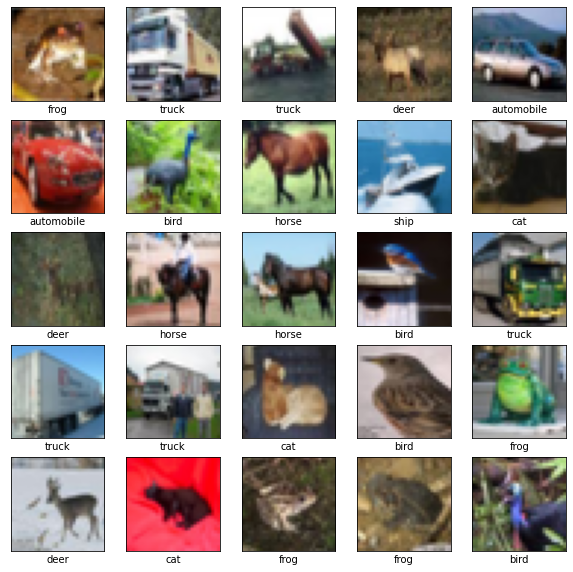

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [29]:
# Define the model
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)          18496     
Total params: 23,584
Trainable params: 23,584
Non-trainable params: 0
_________________________________________________________________


In [34]:
# Let's add dense layers with regularization! 
model.add(layers.Flatten())
model.add(layers.Dense(64, kernel_regularizer='l2', activation='relu'))
model.add(layers.Dense(10))

In [35]:
# Compile and train 
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.3241 - accuracy: 0.5840 - val_loss: 1.2078 - val_accuracy: 0.6069
Epoch 2/20
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1559 - accuracy: 0.6212 - val_loss: 1.1295 - val_accuracy: 0.6240
Epoch 3/20
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0879 - accuracy: 0.6401 - val_loss: 1.0931 - val_accuracy: 0.6380
Epoch 4/20
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0397 - accuracy: 0.6571 - val_loss: 1.0778 - val_accuracy: 0.6402
Epoch 5/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0030 - accuracy: 0.6713 - val_loss: 1.0578 - val_accuracy: 0.6511
Epoch 6/20
1563/1563 [==============================] - 13s 9ms/step - loss: 0.9764 - accuracy: 0.6796 - val_loss: 1.1027 - val_accuracy: 0.6406
Epoch 7/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9540 - accuracy: 0.6879 - val_loss: 1.0272 - val_ac

313/313 - 1s - loss: 1.0436 - accuracy: 0.6719


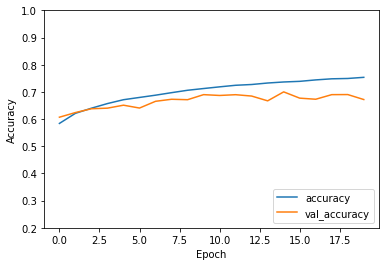

In [36]:
# Evaluate the model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

### Let's do it without regularization

In [69]:
# Define the model
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Let's add dense layers with regularization! 
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

# Compile and train 
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 16s 10ms/step - loss: 1.5408 - accuracy: 0.4352 - val_loss: 1.3066 - val_accuracy: 0.5259
Epoch 2/20
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2092 - accuracy: 0.5701 - val_loss: 1.1299 - val_accuracy: 0.5990
Epoch 3/20
1563/1563 [==============================] - 17s 11ms/step - loss: 1.0655 - accuracy: 0.6249 - val_loss: 1.0286 - val_accuracy: 0.6456
Epoch 4/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9772 - accuracy: 0.6572 - val_loss: 1.0063 - val_accuracy: 0.6491
Epoch 5/20
1563/1563 [==============================] - 13s 9ms/step - loss: 0.9076 - accuracy: 0.6834 - val_loss: 0.9517 - val_accuracy: 0.6702
Epoch 6/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8625 - accuracy: 0.6991 - val_loss: 0.9450 - val_accuracy: 0.6692
Epoch 7/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8160 - accuracy: 0.7142 - val_loss: 0.9499 - val

313/313 - 1s - loss: 1.1011 - accuracy: 0.6819


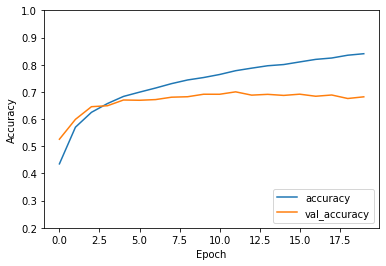

In [70]:
# Evaluate the model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

### Data Augmentation

A technique to increase the diversity of your training set by applying random (but realistic) transformations such as image rotation. You will learn how to apply data augmentation in two ways. First, you will use Keras Preprocessing Layers. Next, you will use tf.image.

In [37]:
%pip install tensorflow_datasets

Note: you may need to restart the kernel to use updated packages.


In [38]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers

In [39]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

Dataset tf_flowers downloaded and prepared to C:\Users\asa279\tensorflow_datasets\tf_flowers\3.0.1. Subsequent calls will reuse this data.


In [42]:
#There are five different kinds of flowers here
num_classes = metadata.features['label'].num_classes
print(num_classes)

5


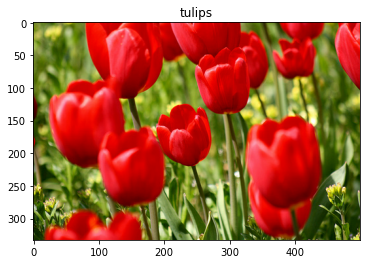

In [43]:
#Let's augment an image
get_label_name = metadata.features['label'].int2str

image, label = next(iter(train_ds))
_ = plt.imshow(image)
_ = plt.title(get_label_name(label))

In [44]:
IMG_SIZE = 180

resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255)
])

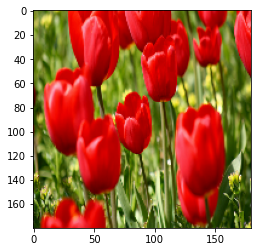

In [46]:
#resizing and scaling
result = resize_and_rescale(image)
_ = plt.imshow(result)

In [47]:
#Let's do some flips!
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [48]:
# Add the image to a batch
image = tf.expand_dims(image, 0)

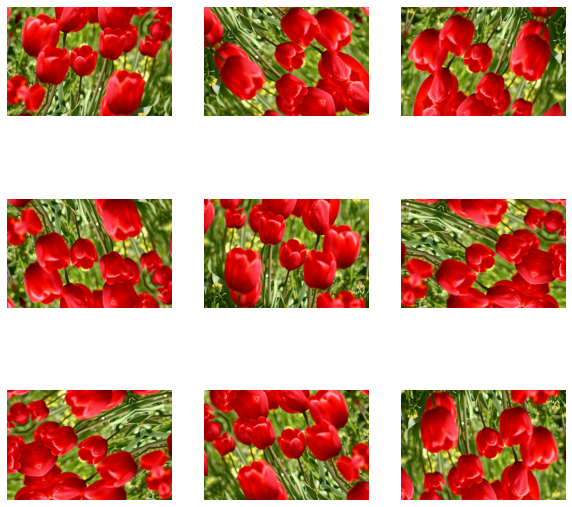

In [49]:
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

### You have two options with data augmentation

Option 1: Make the preprocessing layers part of your model:

In [50]:
model = tf.keras.Sequential([
  resize_and_rescale,
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  # Rest of your model
])

Option 2: Apply the preprocessing layers to your dataset

In [51]:
aug_ds = train_ds.map(
  lambda x, y: (resize_and_rescale(x, training=True), y))

In [52]:
# Let's do the second option!
batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE

def prepare(ds, shuffle=False, augment=False):
  # Resize and rescale all datasets
  ds = ds.map(lambda x, y: (resize_and_rescale(x), y), 
              num_parallel_calls=AUTOTUNE)

  if shuffle:
    ds = ds.shuffle(1000)

  # Batch all datasets
  ds = ds.batch(batch_size)

  # Use data augmentation only on the training set
  if augment:
    ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y), 
                num_parallel_calls=AUTOTUNE)

  # Use buffered prefecting on all datasets
  return ds.prefetch(buffer_size=AUTOTUNE)

In [53]:
train_ds = prepare(train_ds, shuffle=True, augment=True)
val_ds = prepare(val_ds)
test_ds = prepare(test_ds)

In [54]:
model = tf.keras.Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [55]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [57]:
epochs=5
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
92/92 [==============================] - 28s 299ms/step - loss: 1.4143 - accuracy: 0.3798 - val_loss: 1.1703 - val_accuracy: 0.5204
Epoch 2/5
92/92 [==============================] - 29s 313ms/step - loss: 1.1637 - accuracy: 0.4819 - val_loss: 1.0782 - val_accuracy: 0.5504
Epoch 3/5
92/92 [==============================] - 29s 307ms/step - loss: 1.0758 - accuracy: 0.5569 - val_loss: 0.9988 - val_accuracy: 0.6240
Epoch 4/5
92/92 [==============================] - 29s 312ms/step - loss: 0.9878 - accuracy: 0.6035 - val_loss: 0.9363 - val_accuracy: 0.6349
Epoch 5/5
92/92 [==============================] - 28s 305ms/step - loss: 0.9371 - accuracy: 0.6345 - val_loss: 0.9311 - val_accuracy: 0.6458


In [58]:
loss, acc = model.evaluate(test_ds)
print("Accuracy", acc)

12/12 [==============================] - 1s 74ms/step - loss: 0.9079 - accuracy: 0.6485
Accuracy 0.6485013365745544


### You can also customize augmentation!
You can also create custom data augmenation layers. This tutorial shows two ways of doing so. First, you will create a layers.Lambda layer. This is a good way to write concise code. Next, you will write a new layer via subclassing, which gives you more control. Both layers will randomly invert the colors in an image, according to some probability.

In [59]:
def random_invert_img(x, p=0.5):
  if  tf.random.uniform([]) < p:
    x = (255-x)
  else:
    x
  return x

In [60]:
def random_invert(factor=0.5):
  return layers.Lambda(lambda x: random_invert_img(x, factor))

random_invert = random_invert()

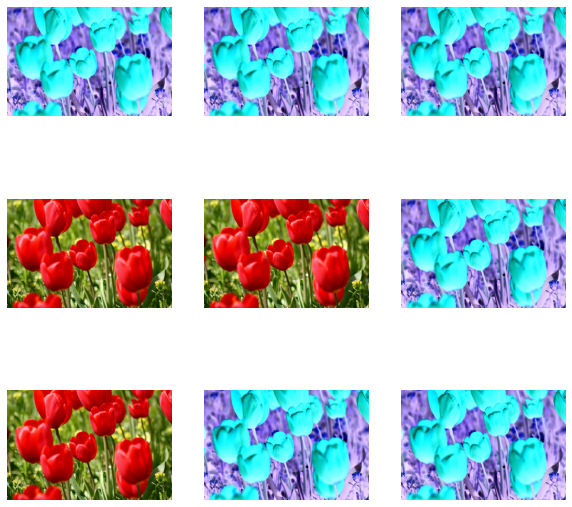

In [61]:
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = random_invert(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0].numpy().astype("uint8"))
  plt.axis("off")

In [64]:
#Next, implement a custom layer by subclassing
class RandomInvert(layers.Layer):
  def __init__(self, factor=0.5, **kwargs):
    super().__init__(**kwargs)
    self.factor = factor

  def call(self, x):
    return random_invert_img(x)

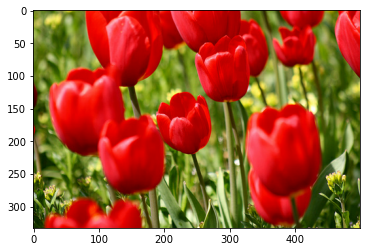

In [63]:
plt.imshow(RandomInvert()(image)[0])

#### Applying data augmentation to a dataset

two options:
- Option 1: Using tf.data.experimental.Counter()
- Option 2: Using tf.random.Generator

In [66]:
#Let's first redownload the dataset
(train_datasets, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

# Let's define a utility function for resizing and rescaling the images

def resize_and_rescale(image, label):
  image = tf.cast(image, tf.float32)
  image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
  image = (image / 255.0)
  return image, label

#Let's also define augment function that can apply the random transformations to the images
def augment(image_label, seed):
  image, label = image_label
  image, label = resize_and_rescale(image, label)
  image = tf.image.resize_with_crop_or_pad(image, IMG_SIZE + 6, IMG_SIZE + 6)
  # Make a new seed
  new_seed = tf.random.experimental.stateless_split(seed, num=1)[0, :]
  # Random crop back to the original size
  image = tf.image.stateless_random_crop(
      image, size=[IMG_SIZE, IMG_SIZE, 3], seed=seed)
  # Random brightness
  image = tf.image.stateless_random_brightness(
      image, max_delta=0.5, seed=new_seed)
  image = tf.clip_by_value(image, 0, 1)
  return image, label

- Option 1: Using tf.data.experimental.Counter()

In [67]:
# Create counter and zip together with train dataset
counter = tf.data.experimental.Counter()

train_ds = tf.data.Dataset.zip((train_datasets, (counter, counter)))

# Map the augment function to the training dataset
train_ds = (
    train_ds
    .shuffle(1000)
    .map(augment, num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
)


val_ds = (
    val_ds
    .map(resize_and_rescale, num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
)


test_ds = (
    test_ds
    .map(resize_and_rescale, num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
)

- Option 2:  Using tf.random.Generator

In [ ]:
# Create a generator
rng = tf.random.Generator.from_seed(123, alg='philox')

# A wrapper function for updating seeds
def f(x, y):
  seed = rng.make_seeds(2)[0]
  image, label = augment((x, y), seed)
  return image, label

#Map the wrapper function f to the training dataset.

train_ds = (
    train_datasets
    .shuffle(1000)
    .map(f, num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
)

)

val_ds = (
    val_ds
    .map(resize_and_rescale, num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
)

test_ds = (
    test_ds
    .map(resize_and_rescale, num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
)

References:
https://www.tensorflow.org/tutorials